<a href="https://colab.research.google.com/github/Choi-Laboratory/measurement_engineering_exercises/blob/master/measurement_engineering_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.　開発環境について 

## 0.1 Google Colaboratoryについて
Google Colaboratory(「グーグル・コラボ」と呼ばれることが多いです)とは、Googleが開発したサービスで、webブラウザ上でPythonを実行することができます。

インターネット環境とブラウザさえあれば、誰でも簡単にPythonを使うことができるので、教育や研究機関を中心に広く使われています。

この授業でも、Google Colaboratory上でみなさんには演習課題に取り組んでもらいます。


## 0.2 Pythonの基本文法
### 0.2.1 Pythonのバージョンの確認
Pythonは昔からバージョン2系が広く使われてきましたが、2020年4月以降からはバージョン３以降を使うことが推奨されています（バージョン２までのサポートは現在終了）。

2020年5月現在、Pythonは２から３への移行期なので、Pythonの開発環境はバージョン２と３が混在している状況です。

今回の授業で使うことはほぼありませんが、テクニックとしてPythonのバージョンを確認する方法を一つ紹介します（これ以外の方法もあります）。

```.python
import sys #Pythonの実況環境やインタプリタの情報を取り扱うライブラリをimportする
print(sys.version) #Pythonのバージョンを出力する
```

In [3]:
import sys #Pythonの実況環境やインタプリタの情報を取り扱うライブラリをimportする
print(sys.version) #Pythonのバージョンを出力する

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]


### 0.2.2 Print文
Pythonで文字列や変数の中身を出力する方法は簡単で、以下のPrint関数の引数に出力したい値を入れるだけです。

```
print("Hello World")
print(12345)
```

In [4]:
print("Hello World")
print(12345)

Hello World
12345


### 0.2.3 変数
Pythonは変数(データを保管する箱)を宣言する場合、型を定義する必要はありません。

```
#C言語の場合はデータに合わせて変数の型を定義する必要がある。
int num_0 = 0; 
float num_1 = 0.00; 
char[4] mojiretsu = "abc";
```

```
　#Pythonの場合は変数の型宣言をしなくても、代入した値をそのまま入れることができる。
num_0 = 0　 
num_1 = 0.00
mojiretsu = "abc"
```

Pythonは型を意識しないで済む分、変数の型がわかりづらいので思わぬバグが発生しやすいです。　  
0と0.00とでは意味が全く異なります。  
Pythonには変数の型を確認する関数が標準で用意されているので、期待した値が出力されない場合は変数の型を確認することをおすすめします。

```
int_num = 0
float_num = 1.23
string = "abc"

print(int_num) # ->0
print(float_num) # ->1.23
print(string) # ->abc

```

In [1]:
int_num = 0
float_num = 1.23
string = "abc"
 
print(int_num) # ->0
print(float_num) # ->1.23
print(string) # ->abc

0
1.23
abc


# 課題1: 輝度値ヒストグラムの作成

画像のコントラストに関する処理を行う際に、その画像の輝度値の分布を知る必要があります。

輝度値の分布を補正することで、画像を明暗をできたり、分布の山と山の間の
谷の部分を閾値とすることで、画像を２値化することもできます。

今回は、画像処理の基本である、輝度値のヒストグラムの作成をしてもらいます。


In [24]:
from google.colab import files
uploaded = files.upload()

Saving lenna.bmp to lenna.bmp


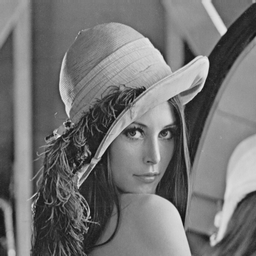

In [4]:
from IPython.display import Image,display_png
display_png(Image("lenna_gray.png"))

In [43]:
import cv2
from google.colab.patches import cv2_imshow
image_file = "lenna_gray.png"
raw_img = cv2.imread(image_file)
gray_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)

hist = []
for i in range(32):
  hist.append(0)

for i in range(256):
  for j in range(256):
    for k in range(32):
      if 8*k <= gray_img[i][j] and gray_img[i][j] < 8*k+7:
        hist[k] += 1

print(hist)

print("     range        freq")
for i in range(32):
  print("{0:03d}".format(i*8), "-", "{0:03d}".format(i*8+7), "[", "{0:04d}".format(hist[i]), "]: ", end="")
  for j in range(int(hist[i]/100)):
    print("*", end="")
  print("")

[0, 1, 110, 693, 2671, 3533, 2122, 1569, 1655, 1688, 2378, 3578, 2385, 2559, 3716, 3424, 3528, 3589, 4310, 2944, 1984, 1803, 1077, 1243, 1426, 1558, 1277, 412, 90, 5, 1, 0]
     range        freq
000 - 007 [ 0000 ]: 
008 - 015 [ 0001 ]: 
016 - 023 [ 0110 ]: *
024 - 031 [ 0693 ]: ******
032 - 039 [ 2671 ]: **************************
040 - 047 [ 3533 ]: ***********************************
048 - 055 [ 2122 ]: *********************
056 - 063 [ 1569 ]: ***************
064 - 071 [ 1655 ]: ****************
072 - 079 [ 1688 ]: ****************
080 - 087 [ 2378 ]: ***********************
088 - 095 [ 3578 ]: ***********************************
096 - 103 [ 2385 ]: ***********************
104 - 111 [ 2559 ]: *************************
112 - 119 [ 3716 ]: *************************************
120 - 127 [ 3424 ]: **********************************
128 - 135 [ 3528 ]: ***********************************
136 - 143 [ 3589 ]: ***********************************
144 - 151 [ 4310 ]: ***********************

# 課題2: ラプラシアンマスク

ラプラシアンマスクの説明

演習課題の説明



# 課題3: テンプレートマッチング

In [69]:
from google.colab import files
uploaded = files.upload()

Saving lenna_gray.png to lenna_gray (2).png


In [0]:
import cv2
from google.colab.patches import cv2_imshow
image_file = "lenna_gray.png"
raw_img = cv2.imread(image_file)
gray_img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2GRAY)

In [0]:
import numpy as np
zero_pad_img = np.pad(gray_img, [(1,1),(1,1)], "constant")

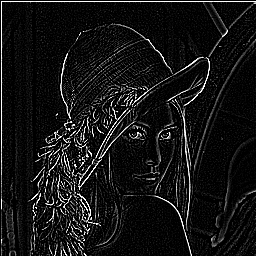

In [72]:
output_img = np.ones((256,256), np.uint8)*255

for x in range(256):
  for y in range(256):
    masked_value = \
       zero_pad_img[x-1][y-1]*-1 + zero_pad_img[x][y-1]*-1 + zero_pad_img[x+1][y-1]*-1 + \
       zero_pad_img[x-1][y]*-1 + zero_pad_img[x][y]*8 + zero_pad_img[x+1][y]*-1 + \
       zero_pad_img[x-1][y+1]*-1 + zero_pad_img[x][y+1]*-1 + zero_pad_img[x+1][y+1]*-1
    
    if masked_value < 0:
      output_img[x][y] = 0
    
    elif masked_value >= 255:
      output_img[x][y] = 255
    
    else:
      output_img[x][y] = masked_value
    
cv2_imshow(output_img)